# Preparação de dados

## Importação de módulos

In [6]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import gpdvega
#import seaborn as sns
#sns.set_context("talk")
#sns.set_style("white")

#from IPython.display import HTML
#import urllib
#import bs4 #this is beautiful soup
#import re # regular expressions

path = '../Dados/shape_files/'
uf_br1 = gpd.read_file(path + 'gadm36_BRA_1.shp')



## Leitura dos dados

In [5]:
dados = pd.read_csv('../Dados/dengue_capitais.csv.gz')

In [44]:
dados.head()

,dt_notificacao,co_cid,co_municipio_notificacao,co_municipio_residencia,dt_diagnostico_sintoma,dt_digitacao
0,2012-12-27 00:00:00,A90,110020,110020,2012-12-21 00:00:00,2013-02-22 00:00:00
1,2013-01-14 00:00:00,A90,110020,110020,2013-01-01 00:00:00,2013-02-22 00:00:00
2,2013-02-12 00:00:00,A90,500270,500270,2013-02-09 00:00:00,2013-02-23 00:00:00
3,2013-02-08 00:00:00,A90,520870,520870,2013-02-01 00:00:00,2013-03-01 00:00:00
4,2013-02-27 00:00:00,A90,431490,431490,2013-02-26 00:00:00,2013-02-27 00:00:00


In [45]:
dados.tail()

,dt_notificacao,co_cid,co_municipio_notificacao,co_municipio_residencia,dt_diagnostico_sintoma,dt_digitacao
3684683,2014-05-15 00:00:00,A90,355030,355030,2014-04-11 00:00:00,2014-05-30 00:00:00
3684684,2014-05-02 00:00:00,A90,355030,355030,2014-04-29 00:00:00,2014-05-31 00:00:00
3684685,2014-05-29 00:00:00,A90,530010,530010,2014-05-28 00:00:00,2014-06-03 00:00:00
3684686,2014-05-27 00:00:00,A90,130260,130260,2014-05-26 00:00:00,2014-05-31 00:00:00
3684687,2016-03-11 00:00:00,A90,410830,410830,2016-03-10 00:00:00,2016-03-11 00:00:00


In [46]:
dados.dtypes

dt_notificacao              object
co_cid                      object
co_municipio_notificacao     int64
co_municipio_residencia      int64
dt_diagnostico_sintoma      object
dt_digitacao                object
dtype: object

In [47]:
dados.isnull().sum()

dt_notificacao                 0
co_cid                         0
co_municipio_notificacao       0
co_municipio_residencia        0
dt_diagnostico_sintoma         8
dt_digitacao                8335
dtype: int64

Temos valores omitidos nas colunas dt_diagnostico_sintoma e dt_digitacao. Vamos usar a data da notificação como índice em nossas análises, dado que, de acordo com o especialista consultado, é mais confiável e não tem valores omitidos. 

É necessário transformar as colunas dt_notificacao, dt_diagnostico_sintoma, e dt_digitacao em data (tipo datetime).

In [48]:
dados.dt_notificacao = pd.to_datetime(dados.dt_notificacao, format = '%Y-%m-%d %H:%M:%S')
dados.dt_diagnostico_sintoma = pd.to_datetime(dados.dt_diagnostico_sintoma, format = '%Y-%m-%d %H:%M:%S')
dados.dt_digitacao = pd.to_datetime(dados.dt_digitacao, format = '%Y-%m-%d %H:%M:%S')

In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684688 entries, 0 to 3684687
Data columns (total 6 columns):
dt_notificacao              datetime64[ns]
co_cid                      object
co_municipio_notificacao    int64
co_municipio_residencia     int64
dt_diagnostico_sintoma      datetime64[ns]
dt_digitacao                datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 168.7+ MB


In [50]:
dados.isnull().sum()

dt_notificacao                 0
co_cid                         0
co_municipio_notificacao       0
co_municipio_residencia        0
dt_diagnostico_sintoma         8
dt_digitacao                8335
dtype: int64

In [51]:
dados.head()

,dt_notificacao,co_cid,co_municipio_notificacao,co_municipio_residencia,dt_diagnostico_sintoma,dt_digitacao
0,2012-12-27,A90,110020,110020,2012-12-21,2013-02-22
1,2013-01-14,A90,110020,110020,2013-01-01,2013-02-22
2,2013-02-12,A90,500270,500270,2013-02-09,2013-02-23
3,2013-02-08,A90,520870,520870,2013-02-01,2013-03-01
4,2013-02-27,A90,431490,431490,2013-02-26,2013-02-27


Vamos obter o ano, o mês e a semana de cada data de notificação para uso posterior.

In [52]:
ano_notificacao = dados.dt_notificacao.dt.year
mes_notificacao = dados.dt_notificacao.dt.month
semana_notificacao = dados.dt_notificacao.dt.week

Criamos então um novo data_frame apenas com a data da notificacao e o município de residencia.

In [53]:
dengue = {'data': dados.dt_notificacao,
          'residencia': dados.co_municipio_residencia}

In [54]:
dengue = pd.DataFrame(dengue)
dengue.head()

,data,residencia
0,2012-12-27,110020
1,2013-01-14,110020
2,2013-02-12,500270
3,2013-02-08,520870
4,2013-02-27,431490


In [55]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684688 entries, 0 to 3684687
Data columns (total 2 columns):
data          datetime64[ns]
residencia    int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 56.2 MB


In [56]:
dengue_semana = dengue.groupby(['residencia']).resample('W', on='data').count()

In [57]:
dengue_semana.head()

data  residencia
residencia data                        
110020     2007-01-07     4           4
           2007-01-14     9           9
           2007-01-21    16          16
           2007-01-28     9           9
           2007-02-04    11          11

In [58]:
dengue_semana.drop(columns=['residencia'], inplace=True)
dengue_semana.rename({'data':'ocorrencias'}, axis='columns', inplace=True)

In [59]:
dengue_semana.head()

ocorrencias
residencia data                   
110020     2007-01-07            4
           2007-01-14            9
           2007-01-21           16
           2007-01-28            9
           2007-02-04           11

In [60]:
dengue_semana.index.get_level_values('residencia')

Int64Index([110020, 110020, 110020, 110020, 110020, 110020, 110020, 110020,
            110020, 110020,
            ...
            530010, 530010, 530010, 530010, 530010, 530010, 530010, 530010,
            530010, 530010],
           dtype='int64', name='residencia', length=29403)

In [61]:
dengue_semana.index.get_level_values('data')

DatetimeIndex(['2007-01-07', '2007-01-14', '2007-01-21', '2007-01-28',
               '2007-02-04', '2007-02-11', '2007-02-18', '2007-02-25',
               '2007-03-04', '2007-03-11',
               ...
               '2019-03-10', '2019-03-17', '2019-03-24', '2019-03-31',
               '2019-04-07', '2019-04-14', '2019-04-21', '2019-04-28',
               '2019-05-05', '2019-05-12'],
              dtype='datetime64[ns]', name='data', length=29403, freq=None)

### Plot da série para um município

Analisaremos um município, para tentarmos entender o cenário

Text(0.5, 0, 'Ano')

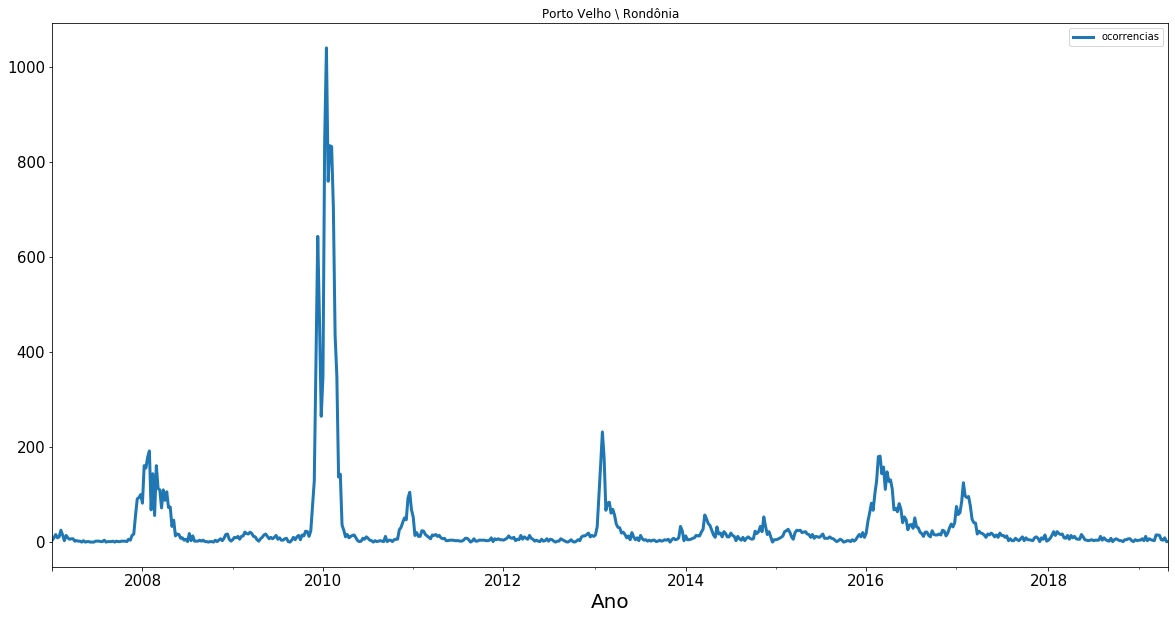

In [62]:
dengue_semana.loc[110020].plot(figsize=(20,10), linewidth=3, fontsize=15, title='Porto Velho \  Rondônia')
plt.xlabel('Ano', fontsize=20)

É possível ver que a série possui uma sazonalidade. Em 2010 houve um pico muito maior do que os demais.

### Plot das séries de todos os municípios de residência

In [63]:
dados_alt = dengue_semana.reset_index()
dados_alt.head()

,residencia,data,ocorrencias
0,110020,2007-01-07,4
1,110020,2007-01-14,9
2,110020,2007-01-21,16
3,110020,2007-01-28,9
4,110020,2007-02-04,11


### Comparando municípios distintos

In [64]:
dados_alt = dados_alt[dados_alt.residencia.isin([110020, 120040, 130260])]
dados_alt.residencia.unique()

array([110020, 120040, 130260])

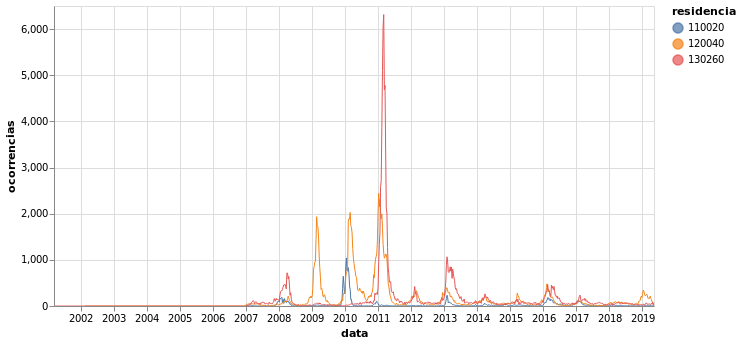

In [65]:
highlight = alt.selection(type='single', 
                          on='mouseover',
                          fields=['residencia'],
                          nearest=True)

base = alt.Chart(dados_alt).encode(
    x='data:T',
    y='ocorrencias:Q',
    color='residencia:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

linhas = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
).interactive()

points + linhas

É possível notar que os três municípios considerados exibem um caráter sazonal, onde a maioria dos picos ocorre no verão. O que é de se esperar, pela dinâmica de transmissão da dengue.

### Lista de municípios da notificação e de residência da pessoa que contraiu dengue.

In [66]:
municipios = sorted(dados.co_municipio_notificacao.unique().tolist())
residencias = sorted(dados.co_municipio_residencia.unique().tolist())

print(type(municipios), len(municipios), type(residencias), len(residencias))

<class 'list'> 2055 <class 'list'> 28


### Problema: 
Temos 2055 municípios de notificação e apenas 28 de residência

In [67]:
residencias

[110020,
 120040,
 130260,
 140010,
 150140,
 160030,
 172100,
 211130,
 221100,
 230440,
 240810,
 250750,
 261160,
 270430,
 280030,
 292740,
 310620,
 320530,
 330455,
 355030,
 410690,
 410830,
 420540,
 431490,
 500270,
 510340,
 520870,
 530010]

Dado o problema acima, vamos concentrar os casos por município. Reduzindo para 27 municípios. Juntamente com isso, iremos adicionar os nomes dos municípios ao dataframe, utilizando seu código único. Optamos por fazer ambos os processos separado desse notebook. A filtragem de casos por município está descrita no arquivo *per_capta.py* e a inserção do nome dos municípios, está descrita em *wrangling.py*.

Agora que temos um dataset mais organizado, podemos analisar mais profundamente a dinâmica da dengue no Brasil.

In [2]:
dcapitais = pd.read_csv('../Dados/dengue.csv.gz')
dhabitantes = pd.read_csv('../Dados/dengue_por_habitante.csv.gz')

NameError: name 'pd' is not defined

In [ ]:
dcapitais.head()

In [ ]:
## Note que os primeiros anos não possuem casos anotados
dhabitantes.head()


In [ ]:
## A partir de 2007 os casos tornam-se mais significantes para o estudo.

dhabitantes[dhabitantes['dt_sintoma']>= '2007']

Note que existem dados desde 1950, mas só a partir de 2007 que começamos a ter casos consideráveis. Portanto usaremos o dataframe apenas a partir de 2007.

In [68]:
Iregioes = {'Norte':[['Acre', 'Rio Branco'],['Amapá','Macapá'],['Amazonas','Manaus'],['Pará','Belém'],['Rondônia','Porto Velho'],['Roraima','Boa Vista'],['Tocantins','Palmas']], 'Nordeste': [['Alagoas', 'Maceió'], \
['Bahia','Salvador'],['Ceará','Fortaleza'],['Maranhão','São Luís'],['Paraíba','João Pessoa'],['Pernambuco','Recife'],['Piauí','Teresina'],['Rio Grande do Norte','Natal'],['Sergipe','Aracaju']], 'Centro-Oeste': \
[['Goiás','Goiânia'],['Mato Grosso','Cuiabá'],['Mato Grosso do Sul','Campo Grande']],'Sudeste': [['Espírito Santo','Vitória'],['Minas Gerais','Belo Horizonte'],['Rio de Janeiro','Rio de Janeiro'],['São Paulo','São Paulo']], \
'Sul':[['Paraná','Curitiba'],['Santa Catarina','Florianópolis'],['Rio Grande do Sul','Porto Alegre']]}
### Função para plotar 12 gráficos, para cada mês de um determinado ano e região brasileira
def plot_geo_UF_year(year,regiao):
    dic = {regiao:[v[0] for v in Iregioes[regiao]]}
    regioes = pd.DataFrame(dic)
    uf = uf_br1[uf_br1['NAME_1'].isin(regioes[regiao])]
    dreg = dhabitantes[dhabitantes['regiao']==regiao]
    dreg = dreg[['dt_sintoma','municipio','ocorrencias','UF','por_habitante']]
    dreg['dt_sintoma'] = pd.to_datetime(dreg['dt_sintoma'])
    dreg = dreg[dreg['dt_sintoma']>= '2007']
    dreg['por_habitante'] = dreg['por_habitante']
    dreg.index = dreg['dt_sintoma']
    dreg = dreg[['municipio','ocorrencias','UF','por_habitante']]
    dreg_M = dreg.groupby(['UF',pd.Grouper(freq='M')]).sum()
    dreg_M = dreg_M.reset_index()
    for x in dreg_M.index:
        dreg_M['dt_sintoma'][x] = dreg_M['dt_sintoma'][x].strftime('%Y-%m')
    dreg_M['geometry'] = 0
    for x in dreg_M.index:
        for y in uf.index:
            if dreg_M['UF'][x] == uf['HASC_1'][y].replace('BR.',''):
                dreg_M['geometry'][x] = uf['geometry'][y]    
    dreg_M = gpd.GeoDataFrame(dreg_M)
    charts = []
    for x in range(1,13):
        x = alt.Chart(dreg_M[dreg_M['dt_sintoma']==str(year)+'-'+str(x)],
                      width=200,
                      height=200,
                      title='Mês ' + str(x)  
                     ).mark_geoshape().encode(alt.Color('por_habitante',
                                              scale = alt.Scale(scheme='lightgreyred'), title = 'Incidência por 100k habitantes')
                                             )
        charts.append(x)
    charts_int = [alt.vconcat() for i in range(1,4)]
    for x in range(0,12):
        for i in range(0,3):
            if x%3 == i:
                charts_int[i] &= charts[x]
    return(charts_int)


ATENÇÃO!! As funções abaixo exigem algum recurso computacional. Não foram previamente rodadas por isso.

As células abaixo não foram rodadas previamente pois consumem muita memória e espaço. 

In [ ]:
chart = plot_geo_UF_year(2010,'Norte')

chart[0] | chart[1] | chart[2]

In [ ]:
chart = plot_geo_UF_year(2010,'Nordeste')
chart[0] | chart[1] | chart[2]

In [ ]:
chart = plot_geo_UF_year(2010,'Sudeste')
chart[0] | chart[1] | chart[2]

In [ ]:
chart = plot_geo_UF_year(2010,'Sul')
chart[0] | chart[1] | chart[2]

Podemos notar que existe uma tendência a propagação da doença à estados vizinhos. Os focos começam em um e se espalham para os mais próximos.

A parte preditória está exposta em dois notebooks separados, um para cada modelo. Uma árvore de decisão e uma rede neural.